In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os as os

In [2]:
pov16 = pd.read_csv("data/Census Data/poverty2016.csv")
pov17 = pd.read_csv("data/Census Data/poverty2017.csv")
pov18 = pd.read_csv("data/Census Data/poverty2018.csv")
pov19 = pd.read_csv("data/Census Data/poverty2019.csv")
pov20 = pd.read_csv("data/Census Data/poverty2020.csv")
pov21 = pd.read_csv("data/Census Data/poverty2021.csv")

counties = gpd.read_file('data/NC_Counties/counties.shp')


In [3]:
col_names = pov16.columns.to_list()
col_names

['Label (Grouping)',
 'North Carolina!!Total!!Estimate',
 'North Carolina!!Total!!Margin of Error',
 'North Carolina!!Below poverty level!!Estimate',
 'North Carolina!!Below poverty level!!Margin of Error',
 'North Carolina!!Percent below poverty level!!Estimate',
 'North Carolina!!Percent below poverty level!!Margin of Error',
 'Alamance County, North Carolina!!Total!!Estimate',
 'Alamance County, North Carolina!!Total!!Margin of Error',
 'Alamance County, North Carolina!!Below poverty level!!Estimate',
 'Alamance County, North Carolina!!Below poverty level!!Margin of Error',
 'Alamance County, North Carolina!!Percent below poverty level!!Estimate',
 'Alamance County, North Carolina!!Percent below poverty level!!Margin of Error',
 'Alexander County, North Carolina!!Total!!Estimate',
 'Alexander County, North Carolina!!Total!!Margin of Error',
 'Alexander County, North Carolina!!Below poverty level!!Estimate',
 'Alexander County, North Carolina!!Below poverty level!!Margin of Error',
 

In [4]:
to_rename = {' County, North Carolina!!Total!!Estimate':'_total',
             ' County, North Carolina!!Below poverty level!!Estimate':'_estimate',
             ' County, North Carolina!!Percent below poverty level!!Estimate':'_percentage'}
to_rename 

{' County, North Carolina!!Total!!Estimate': '_total',
 ' County, North Carolina!!Below poverty level!!Estimate': '_estimate',
 ' County, North Carolina!!Percent below poverty level!!Estimate': '_percentage'}

In [5]:
for key, value in to_rename.items():
    print (key)
    print(value)

 County, North Carolina!!Total!!Estimate
_total
 County, North Carolina!!Below poverty level!!Estimate
_estimate
 County, North Carolina!!Percent below poverty level!!Estimate
_percentage


In [6]:
for index,col in enumerate(col_names):
    for key, value in to_rename.items():
        col = col.replace(key, value)
    col_names[index] = col

In [7]:
pov16.columns = col_names # rename columns
pov17.columns = col_names
pov18.columns = col_names
pov19.columns = col_names
pov20.columns = col_names
pov21.columns = col_names
pov18.head() # check dataframe w renamed columns


,Label (Grouping),North Carolina!!Total!!Estimate,North Carolina!!Total!!Margin of Error,North Carolina!!Below poverty level!!Estimate,North Carolina!!Below poverty level!!Margin of Error,North Carolina!!Percent below poverty level!!Estimate,North Carolina!!Percent below poverty level!!Margin of Error,Alamance_total,"Alamance County, North Carolina!!Total!!Margin of Error",Alamance_estimate,...,Yadkin_estimate,"Yadkin County, North Carolina!!Below poverty level!!Margin of Error",Yadkin_percentage,"Yadkin County, North Carolina!!Percent below poverty level!!Margin of Error",Yancey_total,"Yancey County, North Carolina!!Total!!Margin of Error",Yancey_estimate,"Yancey County, North Carolina!!Below poverty level!!Margin of Error",Yancey_percentage,"Yancey County, North Carolina!!Percent below poverty level!!Margin of Error"
0,Population for whom poverty status is determined,"9,881,292","±1,522","1,523,949","±15,319",15.4%,±0.2,"156,158",±376,"26,264",...,"5,692",±797,15.3%,±2.1,"17,509",±66,"3,361",±481,19.2%,±2.7
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"2,258,876","±1,607","498,013","±7,632",22.0%,±0.3,"35,774",±167,"9,059",...,"2,008",±406,25.2%,±5.1,"3,271",±53,818,±222,25.0%,±6.8
3,Under 5 years,"594,448","±1,086","146,941","±2,622",24.7%,±0.4,"9,251",±82,"2,558",...,414,±141,21.3%,±7.2,815,±85,283,±134,34.7%,±15.4
4,5 to 17 years,"1,664,428","±1,621","351,072","±6,233",21.1%,±0.4,"26,523",±143,"6,501",...,"1,594",±333,26.5%,±5.5,"2,456",±99,535,±167,21.8%,±6.6


In [8]:
poverty_sex16 = pov16.iloc[[12,13]] 
poverty_sex16=poverty_sex16[poverty_sex16.columns.drop(list(poverty_sex16.filter(regex='!')))]

poverty_sex17 = pov17.iloc[[12,13]] 
poverty_sex17=poverty_sex17[poverty_sex17.columns.drop(list(poverty_sex17.filter(regex='!')))]

poverty_sex18 = pov18.iloc[[12,13]] 
poverty_sex18=poverty_sex18[poverty_sex18.columns.drop(list(poverty_sex18.filter(regex='!')))]

poverty_sex19 = pov19.iloc[[12,13]] 
poverty_sex19=poverty_sex19[poverty_sex19.columns.drop(list(poverty_sex19.filter(regex='!')))]

poverty_sex20 = pov20.iloc[[12,13]] 
poverty_sex20=poverty_sex20[poverty_sex20.columns.drop(list(poverty_sex20.filter(regex='!')))]

poverty_sex21 = pov21.iloc[[12,13]] 
poverty_sex21=poverty_sex21[poverty_sex21.columns.drop(list(poverty_sex21.filter(regex='!')))]









In [9]:
poverty_sex16 = poverty_sex16.T.reset_index() 
poverty_sex17 = poverty_sex17.T.reset_index() 
poverty_sex18 = poverty_sex18.T.reset_index() 
poverty_sex19 = poverty_sex19.T.reset_index() 
poverty_sex20 = poverty_sex20.T.reset_index() 
poverty_sex21 = poverty_sex21.T.reset_index() 
poverty_sex16

,index,12,13
0,Label (Grouping),Male,Female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
...,...,...,...
296,Yadkin_estimate,"3,349","3,763"
297,Yadkin_percentage,18.1%,19.8%
298,Yancey_total,"8,566","8,847"
299,Yancey_estimate,"1,692","2,021"


In [10]:
poverty_sex16.columns

Index(['index', 12, 13], dtype='object')

In [11]:
sex_cols = ["male","female"]

In [12]:
poverty_sex16.columns = ["counties"] + sex_cols 
poverty_sex17.columns = ['counties'] + sex_cols
poverty_sex18.columns = ['counties'] + sex_cols
poverty_sex19.columns = ['counties'] + sex_cols
poverty_sex20.columns = ['counties'] + sex_cols
poverty_sex21.columns = ['counties'] + sex_cols

poverty_sex16.columns

Index(['counties', 'male', 'female'], dtype='object')

In [13]:
poverty_sex16 = poverty_sex16.drop(poverty_sex16.index[0]) 
poverty_sex17 = poverty_sex17.drop(poverty_sex17.index[0]) 
poverty_sex18 = poverty_sex18.drop(poverty_sex18.index[0]) 
poverty_sex19 = poverty_sex19.drop(poverty_sex19.index[0]) 
poverty_sex20 = poverty_sex20.drop(poverty_sex20.index[0]) 
poverty_sex21 = poverty_sex21.drop(poverty_sex21.index[0]) 







poverty_sex16

,counties,male,female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
5,Alexander_estimate,"2,909","3,331"
...,...,...,...
296,Yadkin_estimate,"3,349","3,763"
297,Yadkin_percentage,18.1%,19.8%
298,Yancey_total,"8,566","8,847"
299,Yancey_estimate,"1,692","2,021"


In [14]:
poverty_sex16.head()

,counties,male,female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
5,Alexander_estimate,"2,909","3,331"


In [15]:
poverty_sex16[poverty_sex16['counties'].str.contains('_percentage')]
poverty_sex17[poverty_sex17['counties'].str.contains('_percentage')]
poverty_sex18[poverty_sex18['counties'].str.contains('_percentage')]
poverty_sex19[poverty_sex19['counties'].str.contains('_percentage')]
poverty_sex20[poverty_sex20['counties'].str.contains('_percentage')]
poverty_sex21[poverty_sex21['counties'].str.contains('_percentage')]


,counties,male,female
3,Alamance_percentage,12.6%,15.9%
6,Alexander_percentage,10.5%,12.6%
9,Alleghany_percentage,20.1%,22.7%
12,Anson_percentage,15.9%,20.6%
15,Ashe_percentage,13.4%,14.5%
...,...,...,...
288,Wayne_percentage,16.6%,20.5%
291,Wilkes_percentage,14.8%,19.8%
294,Wilson_percentage,18.3%,19.4%
297,Yadkin_percentage,14.6%,16.2%


In [16]:
poverty_sex_perc16 = poverty_sex16[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc16 = poverty_sex_perc16.replace('%', '', regex=True)

poverty_sex_perc17 = poverty_sex17[poverty_sex17['counties'].str.contains('_percentage')].copy()
poverty_sex_perc17 = poverty_sex_perc17.replace('%', '', regex=True)

poverty_sex_perc18 = poverty_sex18[poverty_sex18['counties'].str.contains('_percentage')].copy()
poverty_sex_perc18 = poverty_sex_perc18.replace('%', '', regex=True)

poverty_sex_perc19 = poverty_sex19[poverty_sex19['counties'].str.contains('_percentage')].copy()
poverty_sex_perc19 = poverty_sex_perc19.replace('%', '', regex=True)

poverty_sex_perc20 = poverty_sex20[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc20 = poverty_sex_perc20.replace('%', '', regex=True)

poverty_sex_perc21 = poverty_sex21[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc21 = poverty_sex_perc21.replace('%', '', regex=True)

poverty_sex_perc16

,counties,male,female
3,Alamance_percentage,16.6,20.2
6,Alexander_percentage,16.3,18.4
9,Alleghany_percentage,16.4,22.4
12,Anson_percentage,20.8,24.8
15,Ashe_percentage,20.0,19.9
...,...,...,...
288,Wayne_percentage,19.7,23.8
291,Wilkes_percentage,19.7,22.4
294,Wilson_percentage,20.8,24.0
297,Yadkin_percentage,18.1,19.8


In [17]:
poverty_sex_perc16.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc16.counties.to_list()]
poverty_sex_perc17.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc17.counties.to_list()]
poverty_sex_perc18.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc18.counties.to_list()]
poverty_sex_perc19.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc19.counties.to_list()]
poverty_sex_perc20.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc20.counties.to_list()]
poverty_sex_perc21.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc21.counties.to_list()]








poverty_sex_perc16

,counties,male,female,CO_NAME
3,Alamance_percentage,16.6,20.2,ALAMANCE
6,Alexander_percentage,16.3,18.4,ALEXANDER
9,Alleghany_percentage,16.4,22.4,ALLEGHANY
12,Anson_percentage,20.8,24.8,ANSON
15,Ashe_percentage,20.0,19.9,ASHE
...,...,...,...,...
288,Wayne_percentage,19.7,23.8,WAYNE
291,Wilkes_percentage,19.7,22.4,WILKES
294,Wilson_percentage,20.8,24.0,WILSON
297,Yadkin_percentage,18.1,19.8,YADKIN


In [18]:
plot_2016 = counties.merge(poverty_sex_perc16, how='inner', on='CO_NAME')
plot_2017 = counties.merge(poverty_sex_perc17, how='inner', on='CO_NAME')
plot_2018 = counties.merge(poverty_sex_perc18, how='inner', on='CO_NAME')
plot_2019 = counties.merge(poverty_sex_perc19, how='inner', on='CO_NAME')
plot_2020 = counties.merge(poverty_sex_perc20, how='inner', on='CO_NAME')
plot_2021 = counties.merge(poverty_sex_perc21, how='inner', on='CO_NAME')

plot_2016

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,counties,male,female
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1...",Rockingham_percentage,17.6,21.1
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4...",Guilford_percentage,15.9,19.0
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1...",Alamance_percentage,16.6,20.2
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5...",Alexander_percentage,16.3,18.4
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2...",Randolph_percentage,15.8,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-8956678.787 4265467.747, -8956639.3...",Rowan_percentage,16.1,19.7
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-9076711.364 4240834.013, -9076701.7...",Lincoln_percentage,14.5,15.6
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-9010997.879 4230477.548, -9006508.2...",Mecklenburg_percentage,12.8,15.4
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-8992841.086 4233034.497, -8987599.9...",Cabarrus_percentage,10.4,12.9


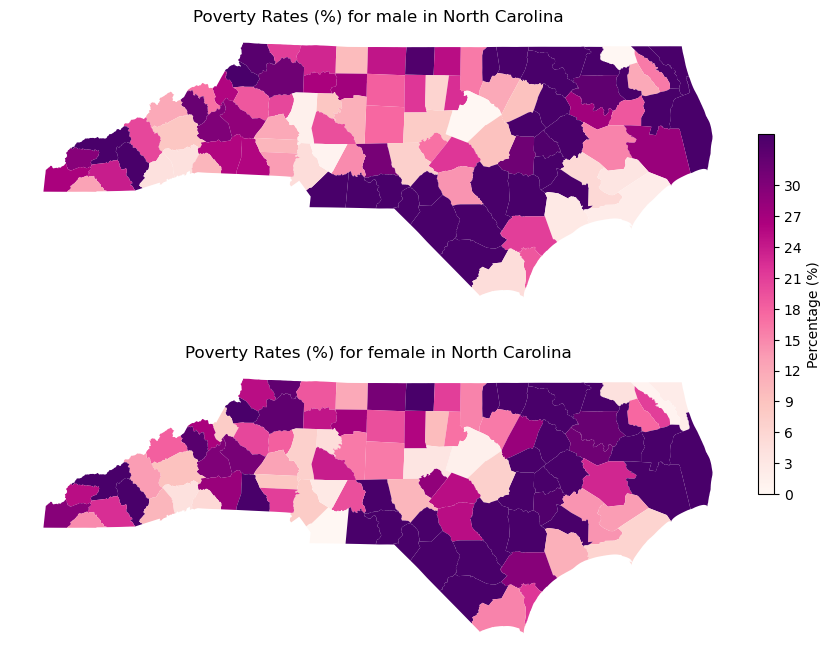

In [19]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2016.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

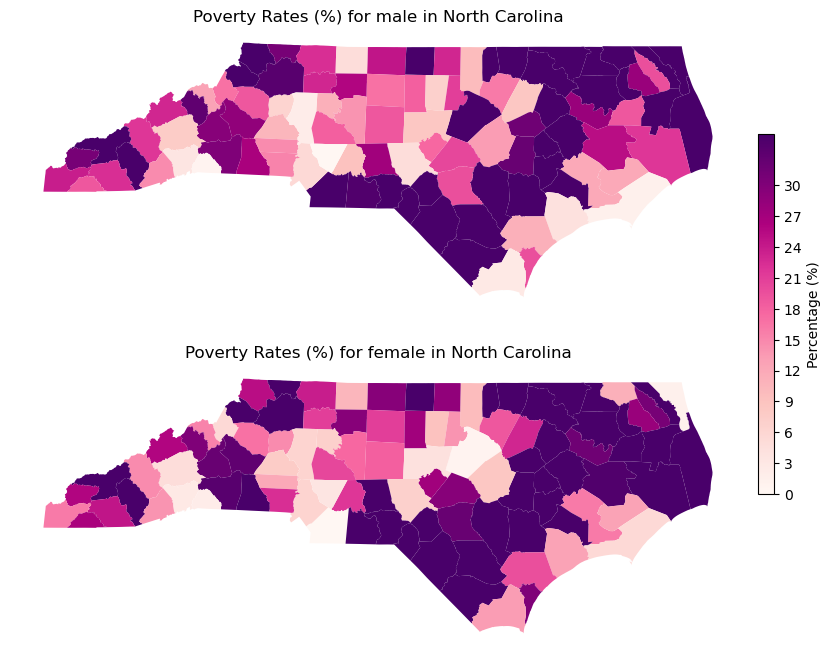

In [20]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2017.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

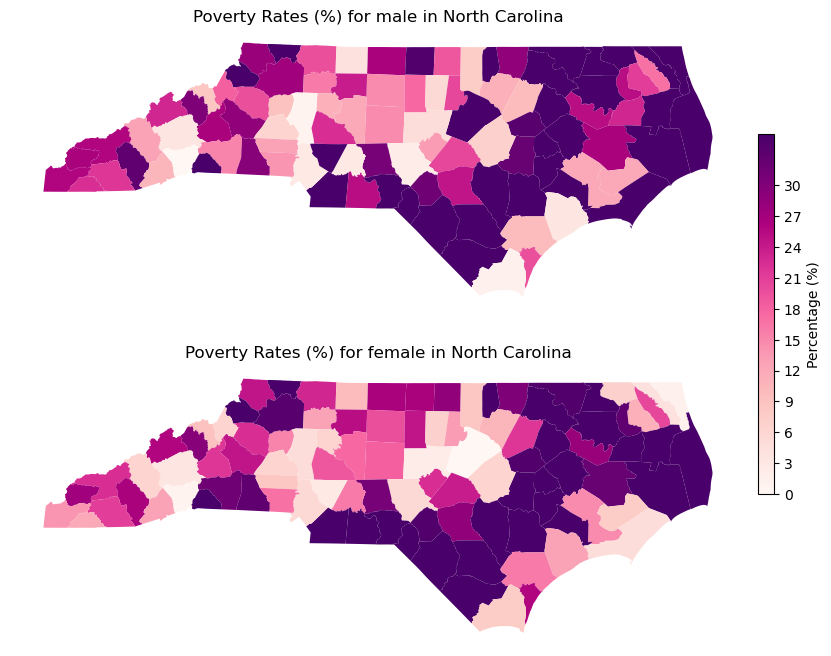

In [21]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2018.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

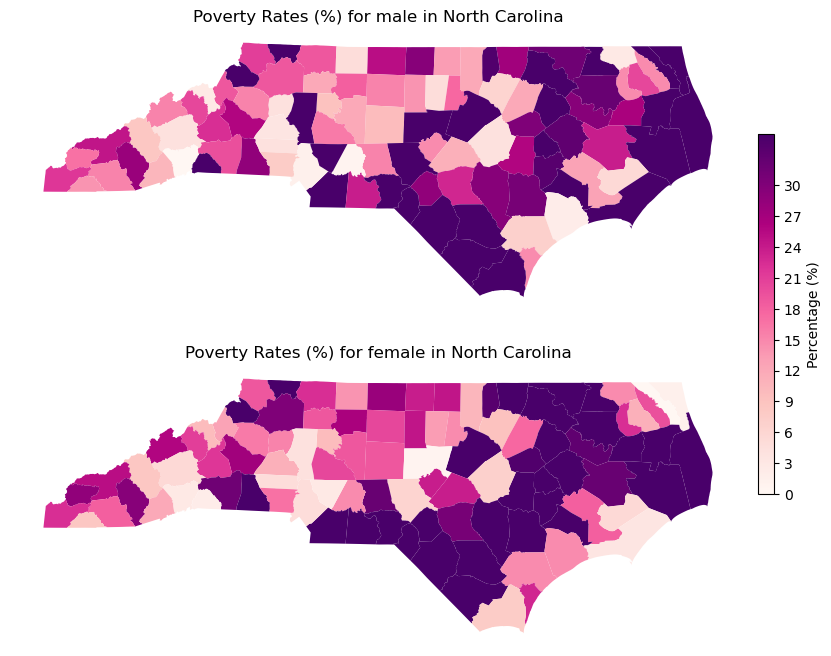

In [22]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2019.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

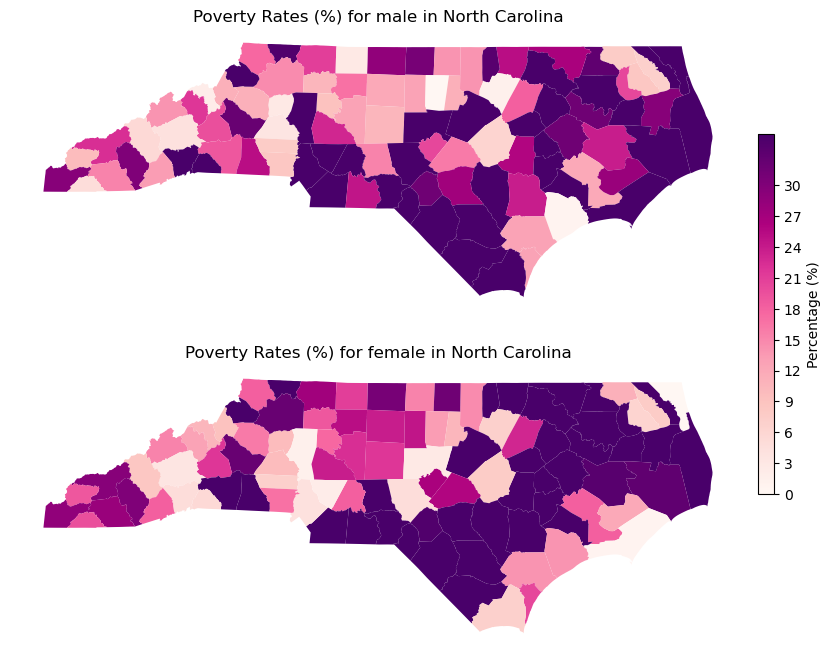

In [23]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2020.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

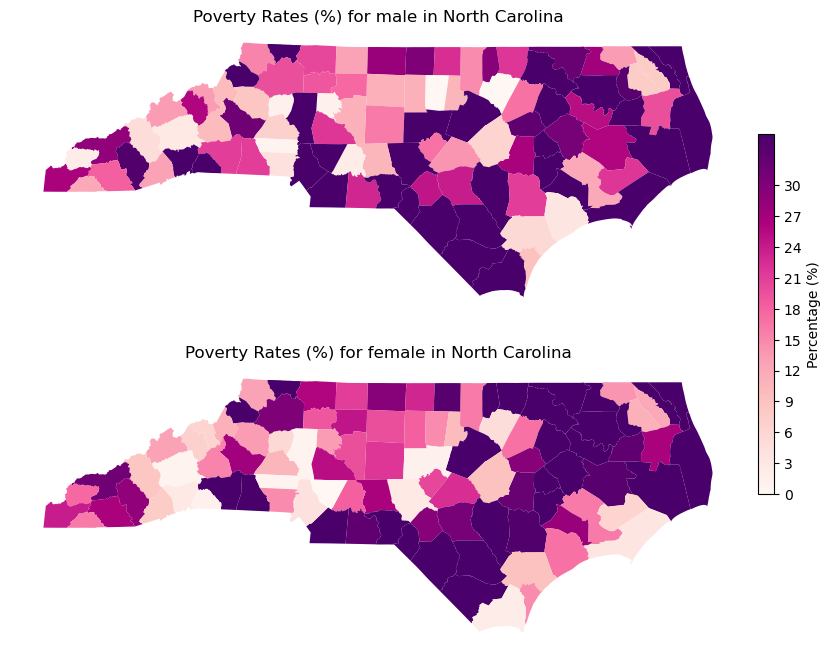

In [24]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2021.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

In [25]:
econ2016= pd.read_csv("Data/Economic Impact/NCecon2016.csv")
econ2017 = pd.read_csv("data/Economic Impact/NCecon2017.csv")
econ2018 = pd.read_csv("data/Economic Impact/NCecon2018.csv")
econ2019 = pd.read_csv("data/Economic Impact/NCecon2019.csv")
econ2020 = pd.read_csv("data/Economic Impact/NCecon2020.csv")
econ2021 = pd.read_csv("data/Economic Impact/NCecon2021.csv")



In [26]:
econ2016 = counties.merge(econ2016, how='inner', on='CO_NAME')
econ2017 = counties.merge(econ2017, how='inner', on='CO_NAME')
econ2018 = counties.merge(econ2018, how='inner', on='CO_NAME')
econ2019 = counties.merge(econ2019, how='inner', on='CO_NAME')
econ2020 = counties.merge(econ2020, how='inner', on='CO_NAME')
econ2021 = counties.merge(econ2021, how='inner', on='CO_NAME')



In [27]:
econ2016 = econ2016.replace('%', '', regex=True)
econ2017 = econ2017.replace('%', '', regex=True)
econ2018 = econ2018.replace('%', '', regex=True)
econ2019 = econ2019.replace('%', '', regex=True)
econ2020 = econ2020.replace('%', '', regex=True)
econ2021 = econ2021.replace('%', '', regex=True)


econ2017.columns

Index(['FID', 'OBJECTID', 'PERIMETER', 'CO_NAME', 'CO_ABBR', 'ACRES',
       'Shape_Leng', 'RO', 'SHAPE_Le_1', 'SHAPE_Area', 'geometry',
       'Expenditure (Millions) ', 'Expenditure Percent Change 2016/2017'],
      dtype='object')

In [28]:
econ2017


,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,Expenditure (Millions),Expenditure Percent Change 2016/2017
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1...",71.60,0.01
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4...",1408.40,0.04
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1...",190.73,0.06
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5...",20.84,0.05
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2...",146.23,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-8956678.787 4265467.747, -8956639.3...",174.79,0.05
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-9076711.364 4240834.013, -9076701.7...",56.60,0.06
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-9010997.879 4230477.548, -9006508.2...",5381.42,0.04
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-8992841.086 4233034.497, -8987599.9...",446.84,0.03


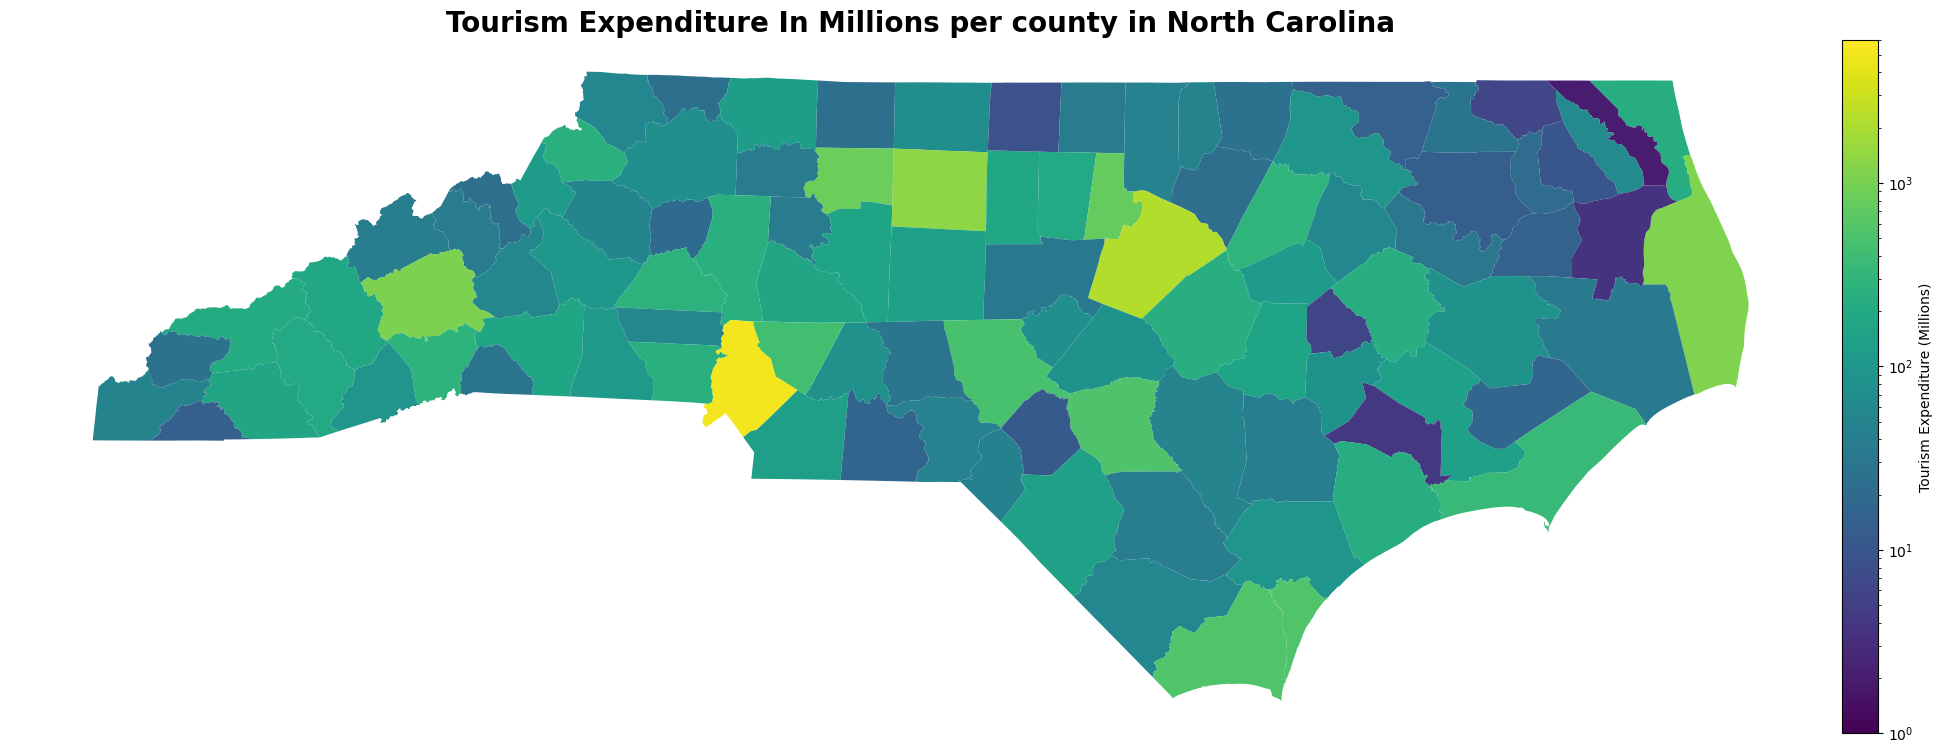

In [29]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable


econcol = econ2016.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2016.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

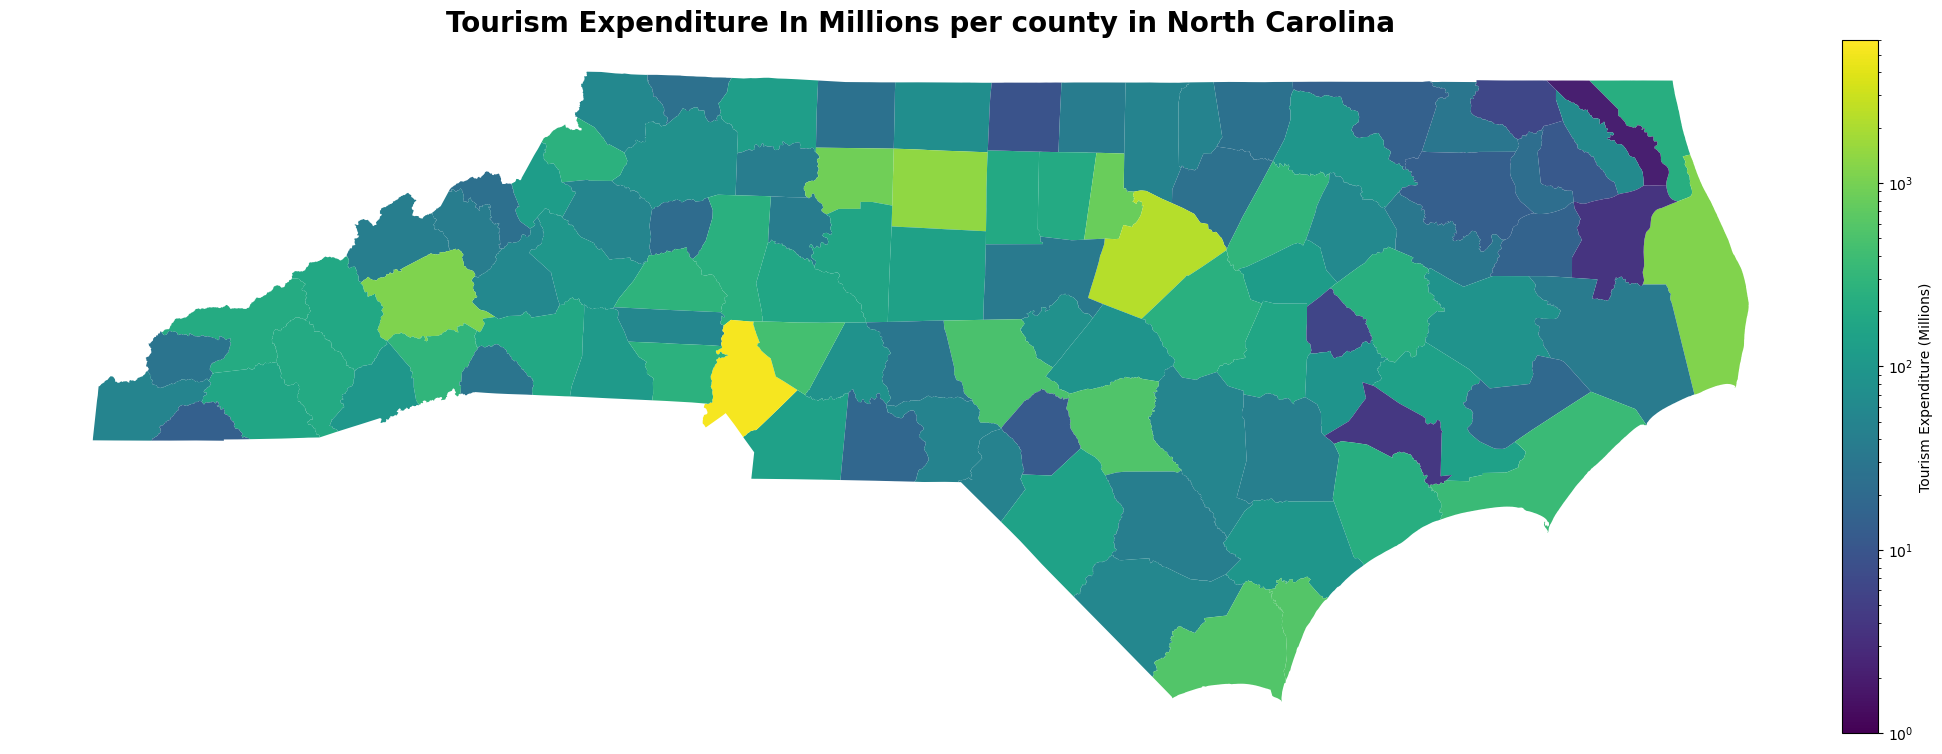

In [30]:

econcol = econ2017.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2017.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()


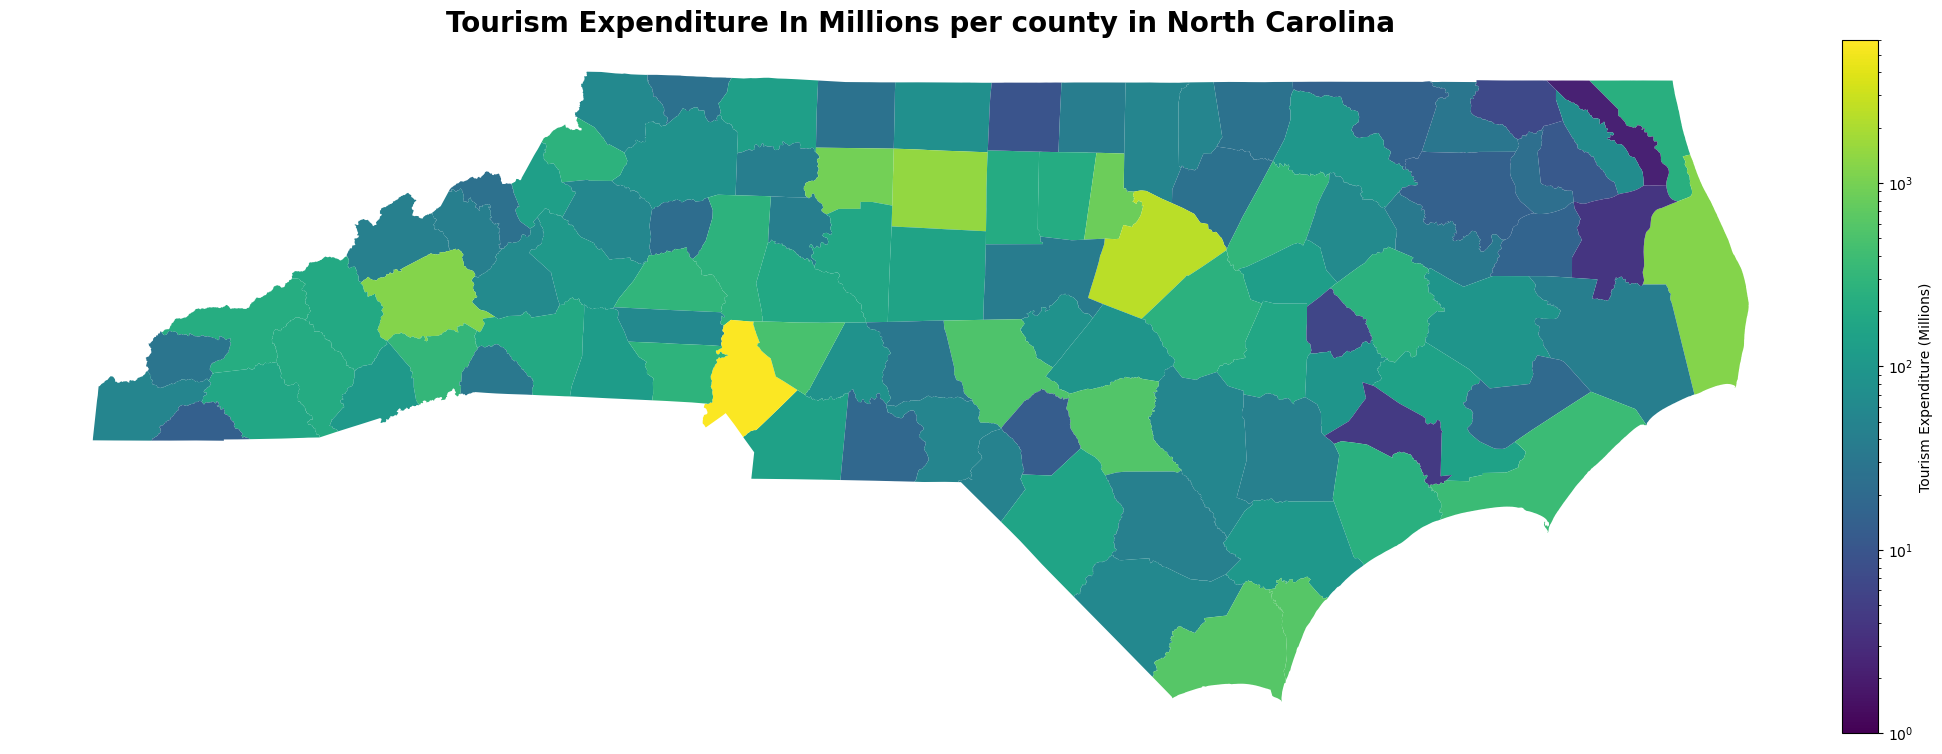

In [31]:
econcol = econ2018.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2018.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

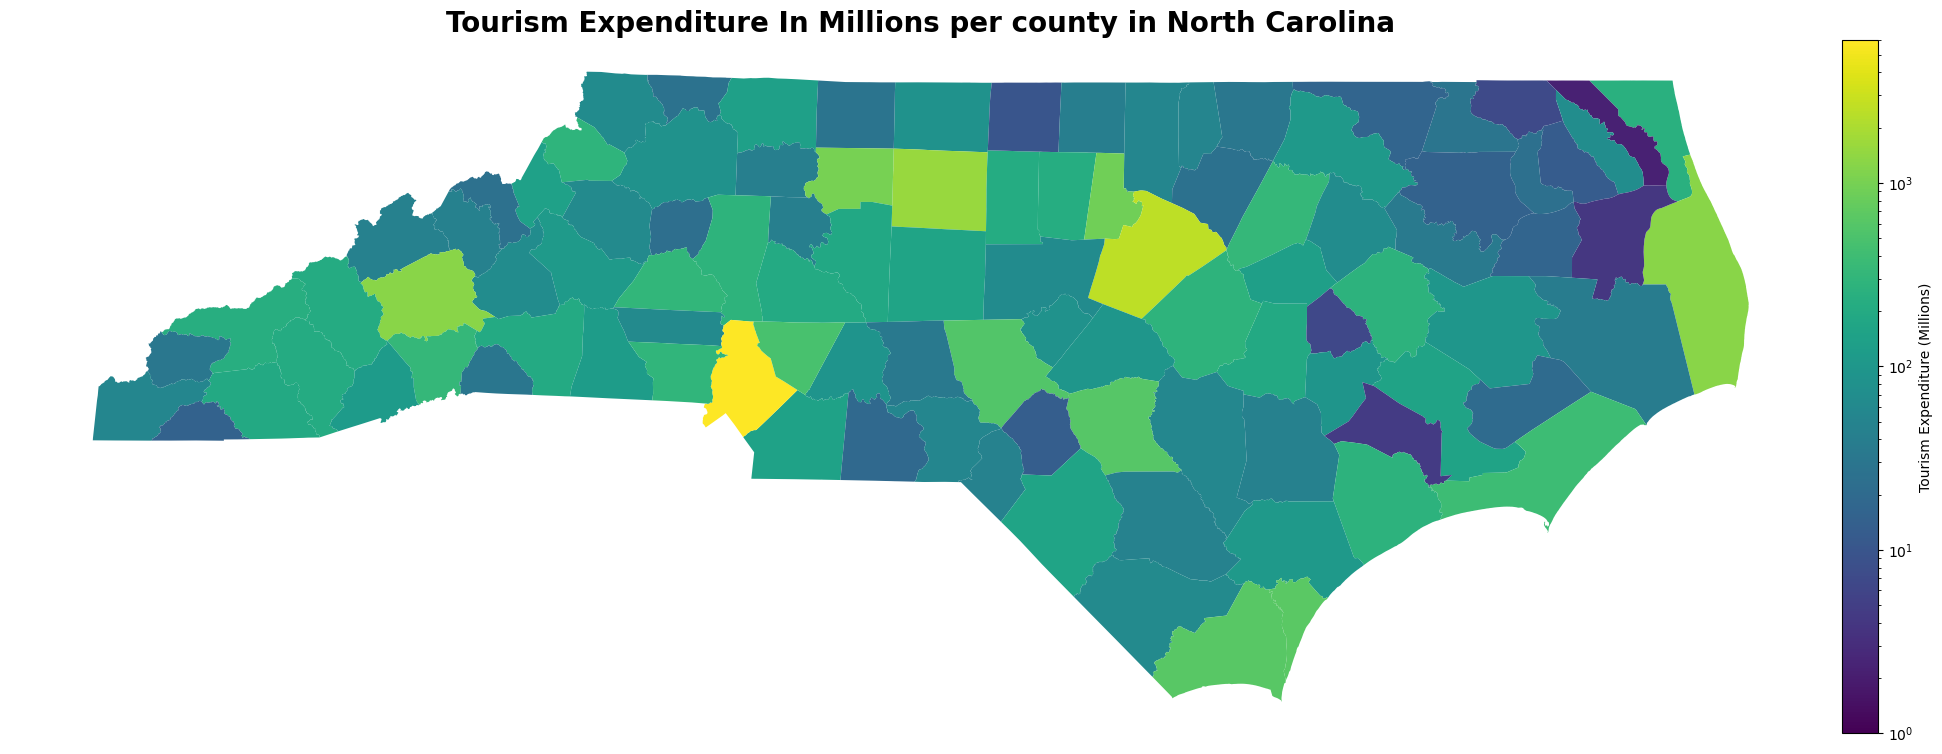

In [32]:
econcol = econ2019.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2019.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

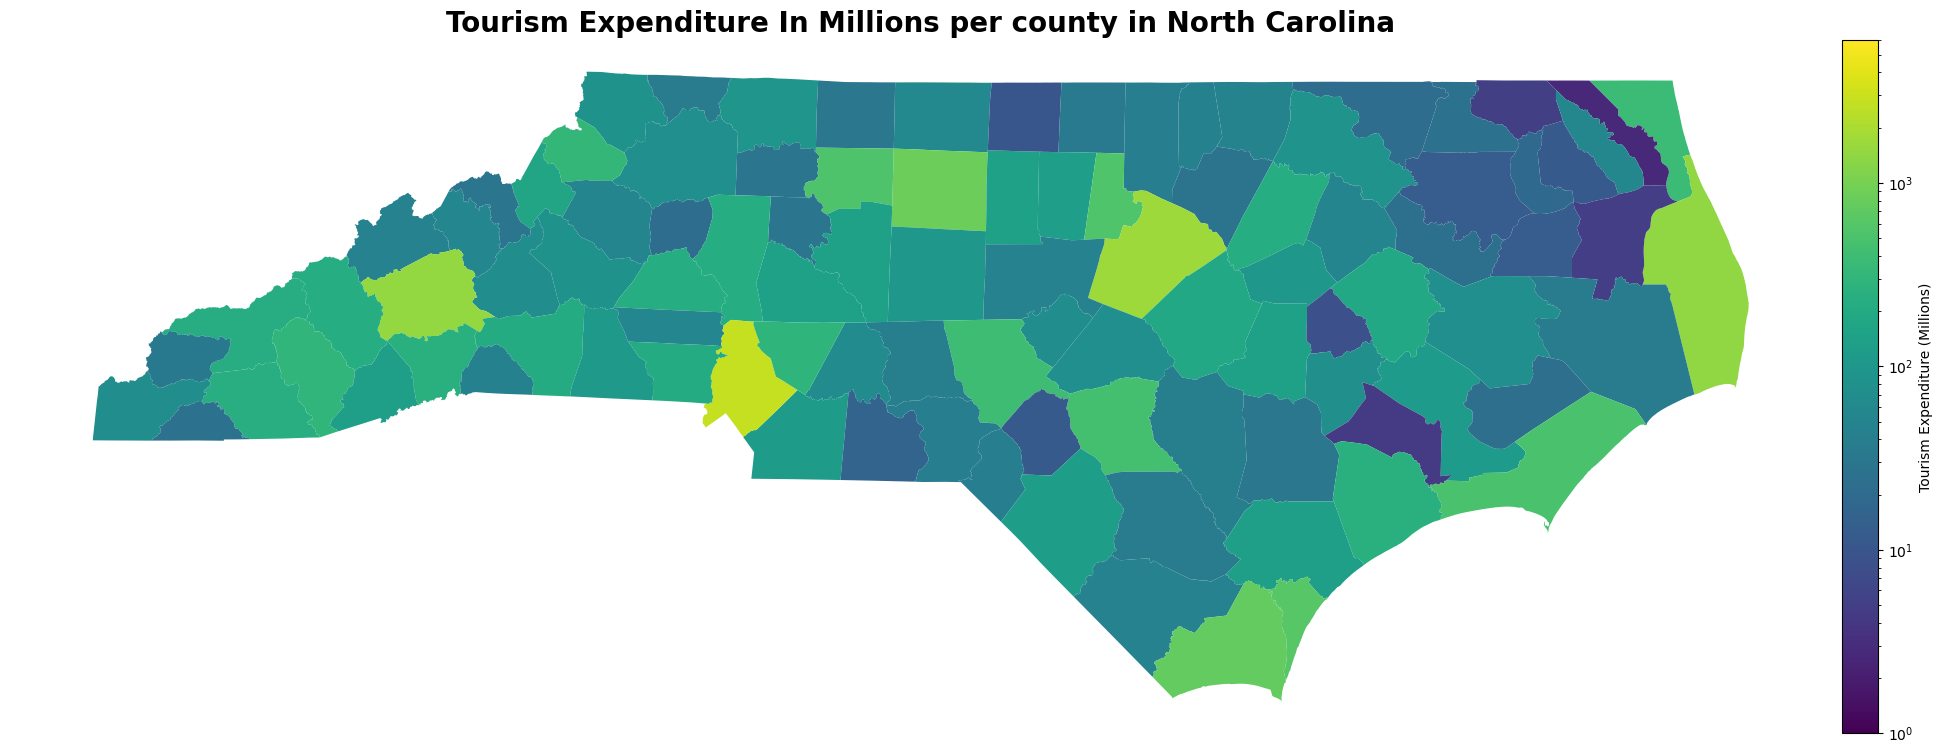

In [33]:
econcol = econ2020.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2020.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

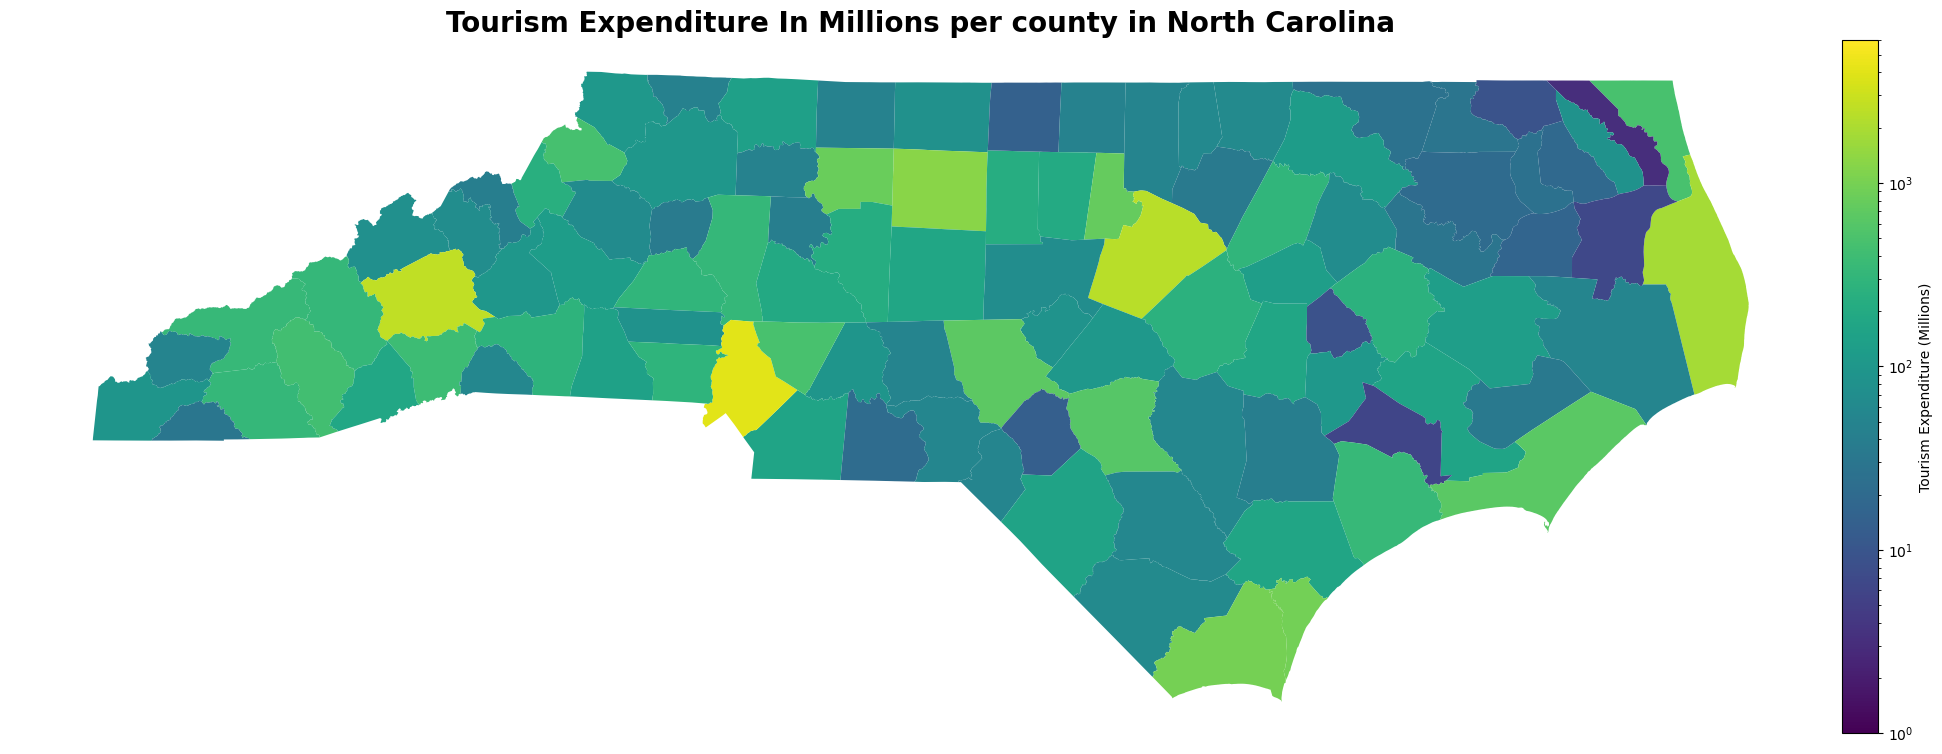

In [34]:
econcol = econ2021.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2021.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

In [35]:
econ2016.columns 



Index(['FID', 'OBJECTID', 'PERIMETER', 'CO_NAME', 'CO_ABBR', 'ACRES',
       'Shape_Leng', 'RO', 'SHAPE_Le_1', 'SHAPE_Area', 'geometry', 'Rank',
       'Expenditure (Millions) ', 'Percent Change 2015/2016'],
      dtype='object')

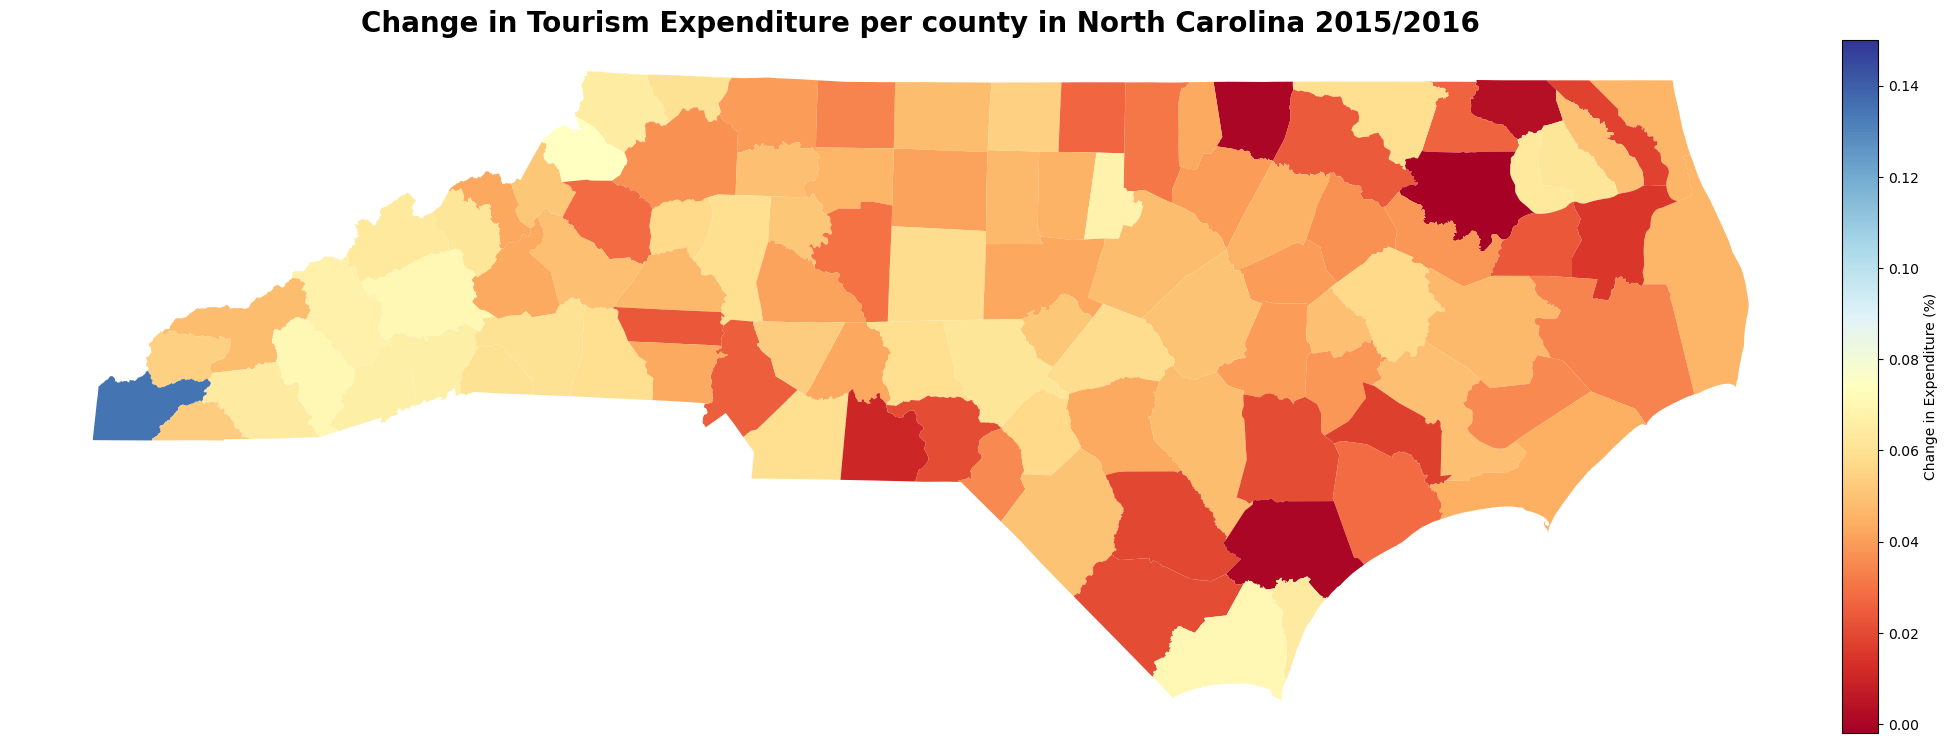

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming you have already imported the necessary libraries and have your DataFrame 'econ2016'

econcol = econ2016.iloc[:, 13]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2016.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.002, vmax=0.15, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2015/2016', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable with a linear normalization
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.002, vmax=0.15))

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()



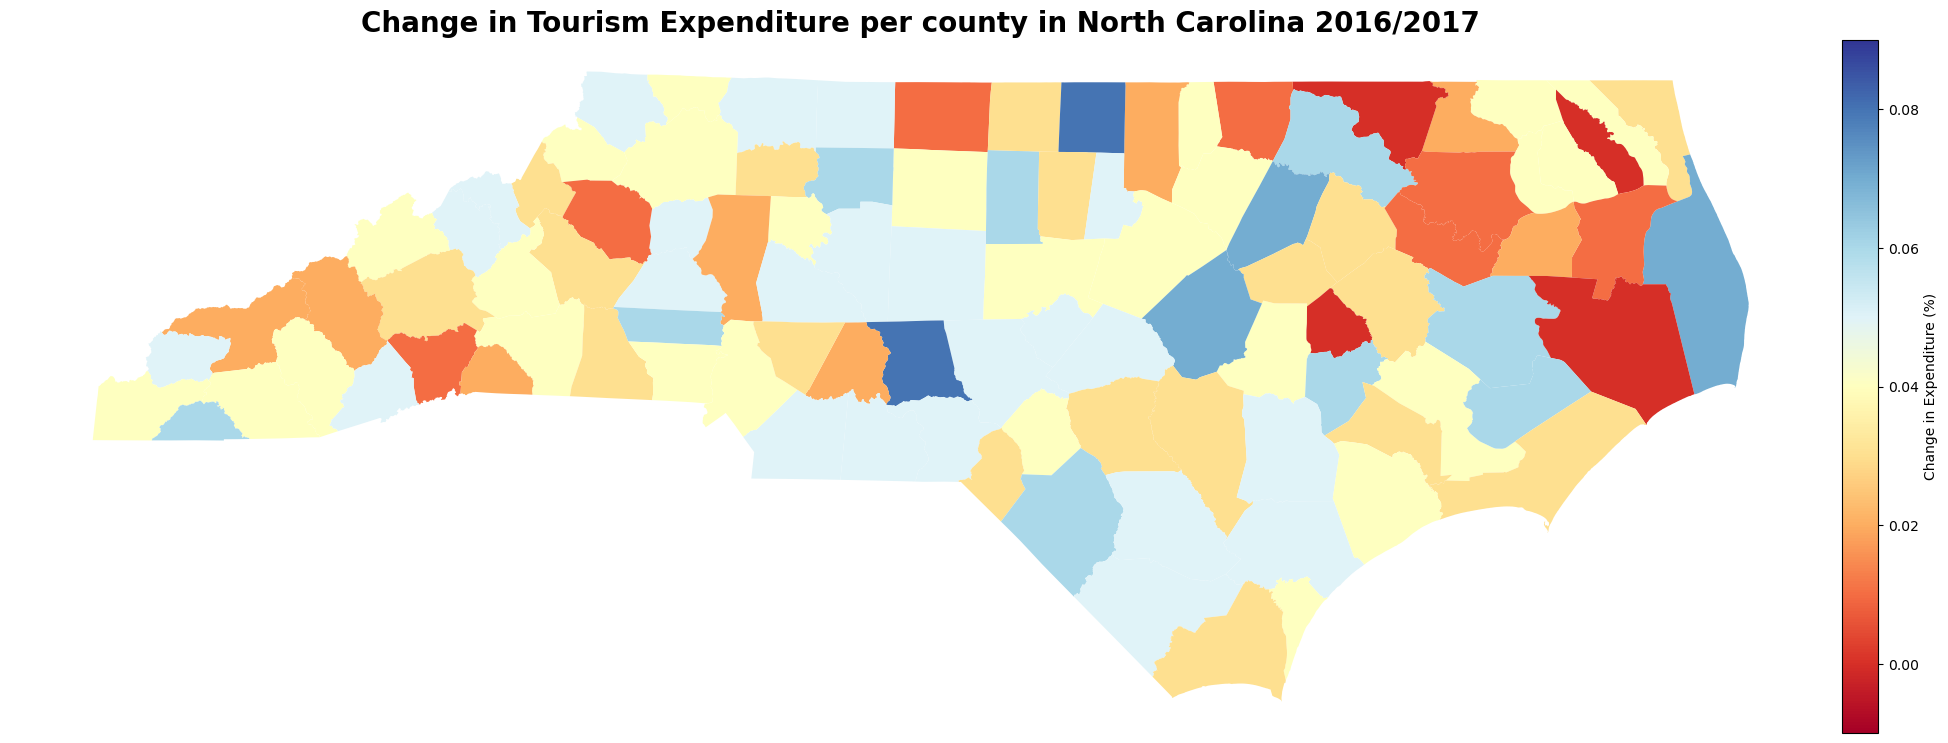

In [37]:
econcol = econ2017.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2017.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.01, vmax=0.09, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2016/2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.01, vmax=0.09))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()


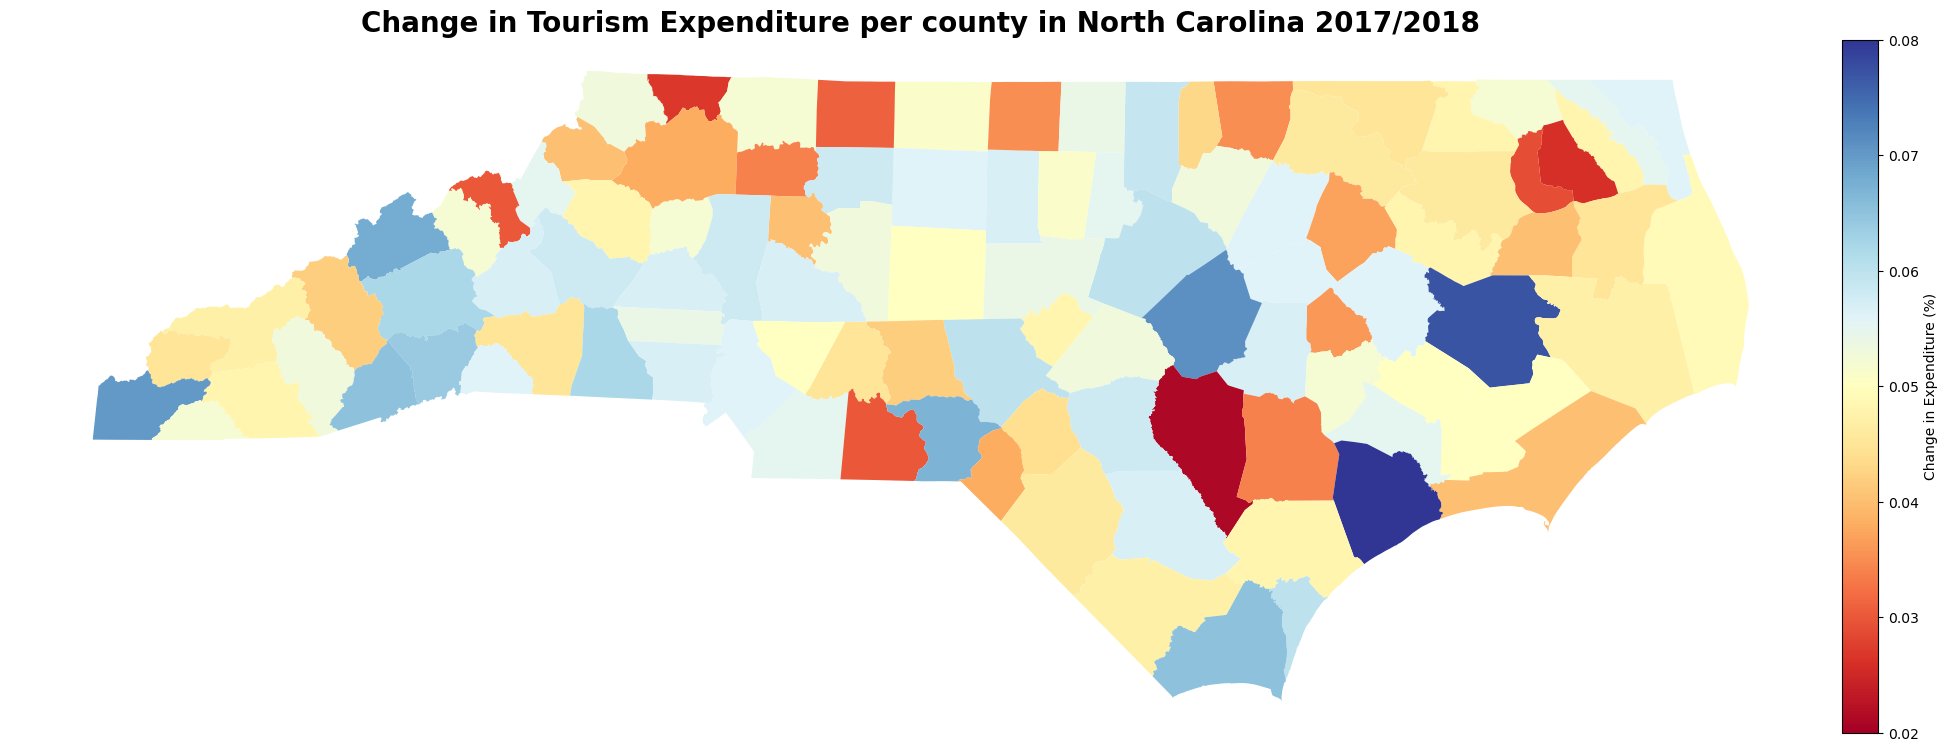

In [38]:
econcol = econ2018.iloc[:, 13]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2018.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=0.020, vmax=0.08, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2017/2018', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=0.02, vmax=0.08))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()

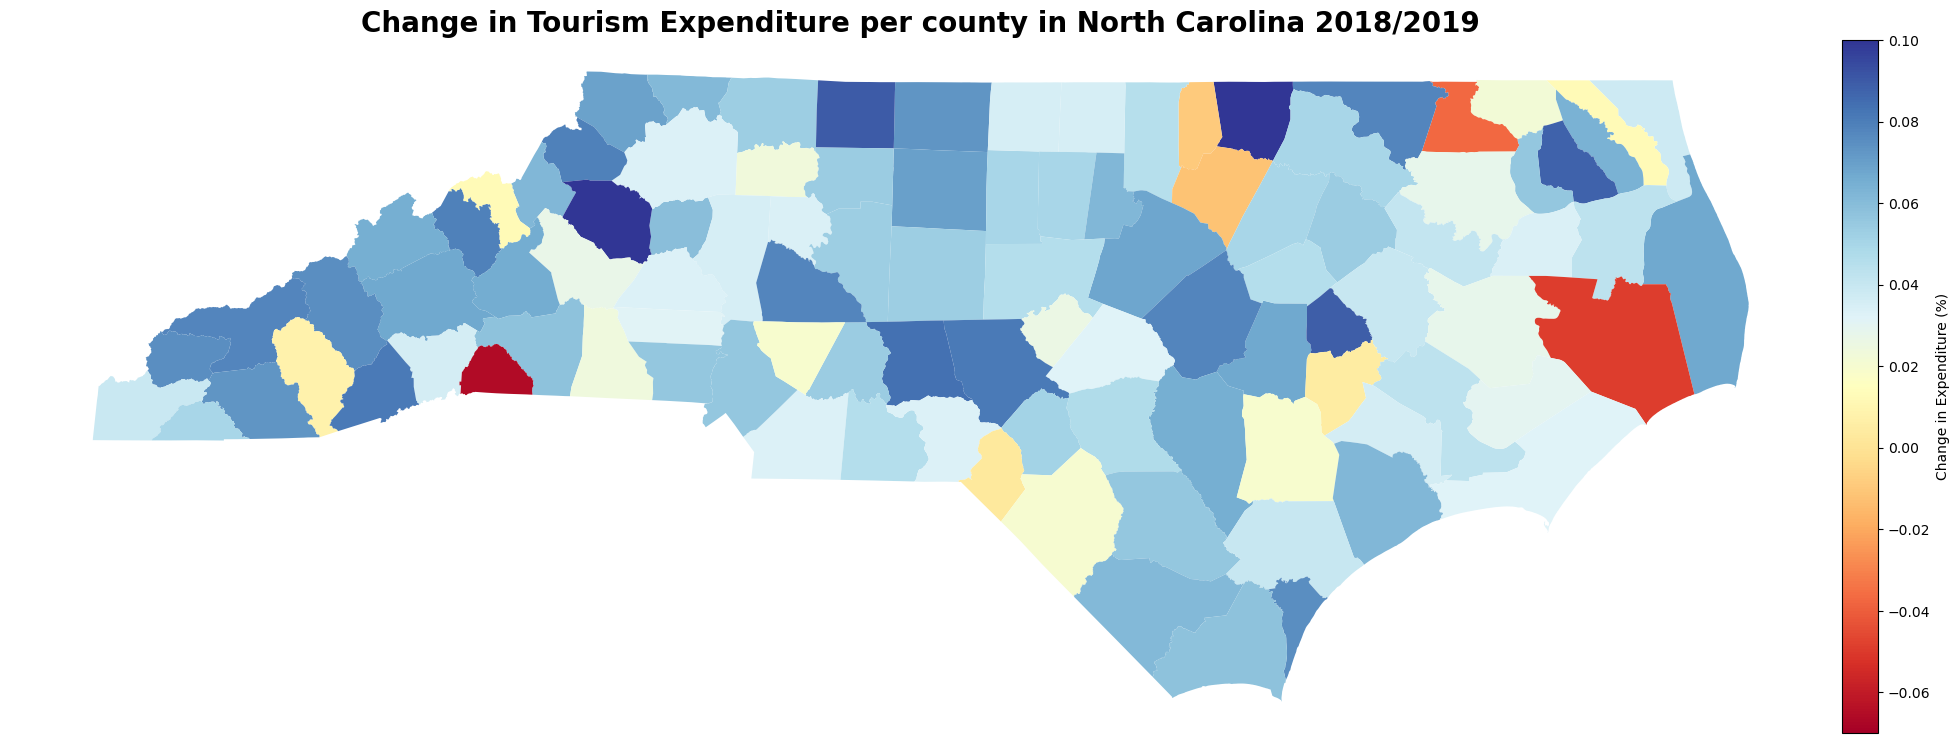

In [39]:
econcol = econ2019.iloc[:, 13]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2019.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.07, vmax=0.1, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2018/2019', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.07, vmax=0.1))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()

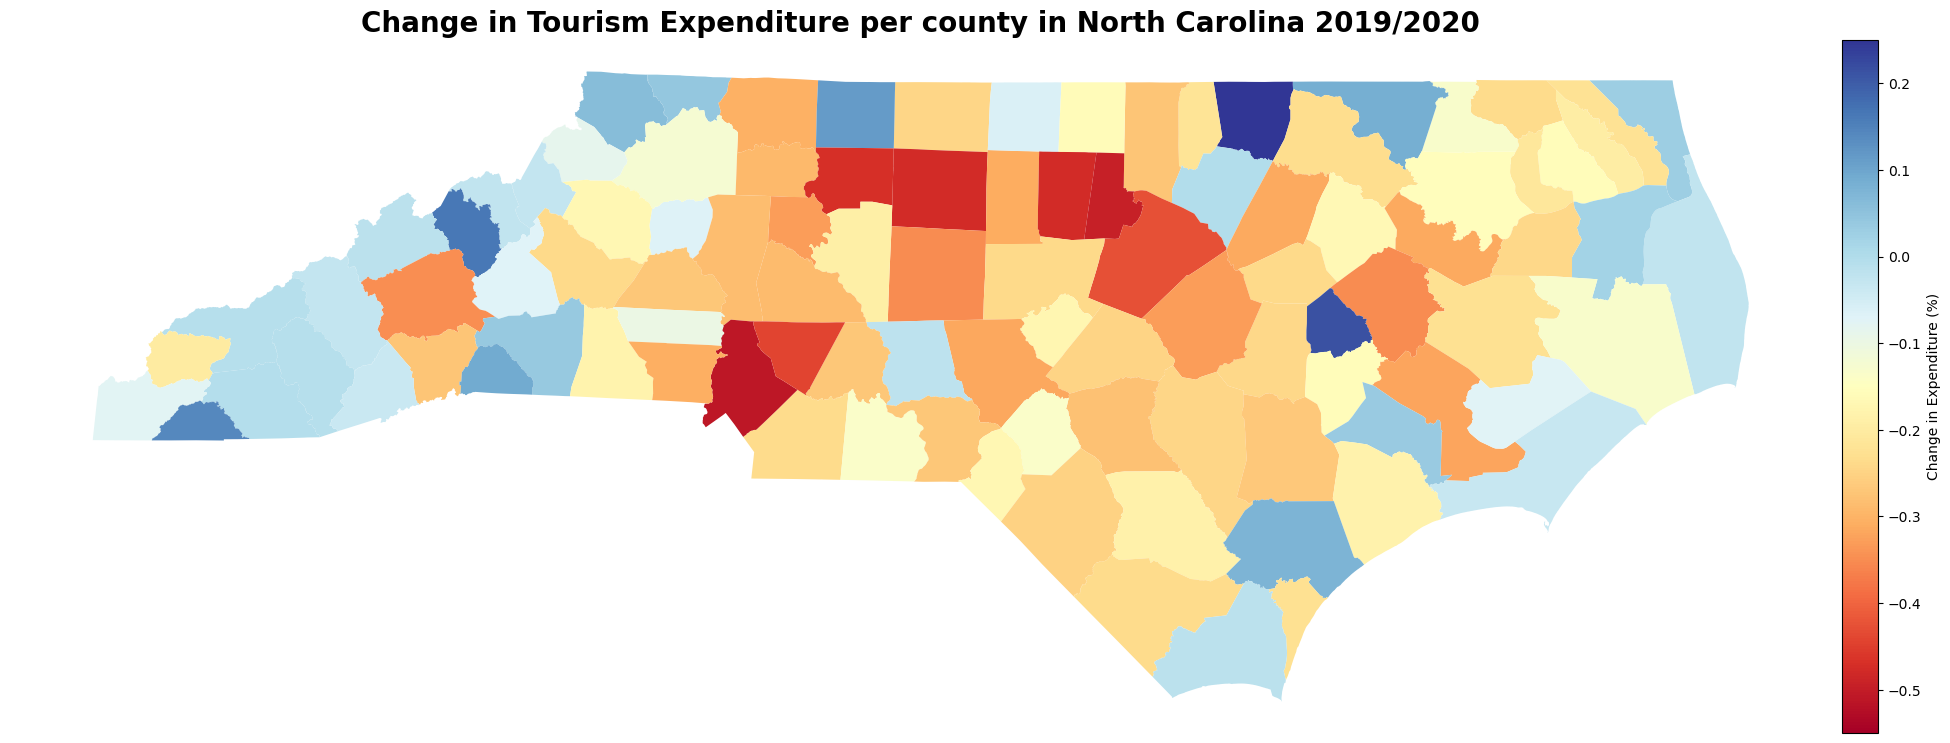

In [40]:

econcol = econ2020.iloc[:, 13]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2020.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.55, vmax=0.25, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2019/2020', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.55, vmax=0.25))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()


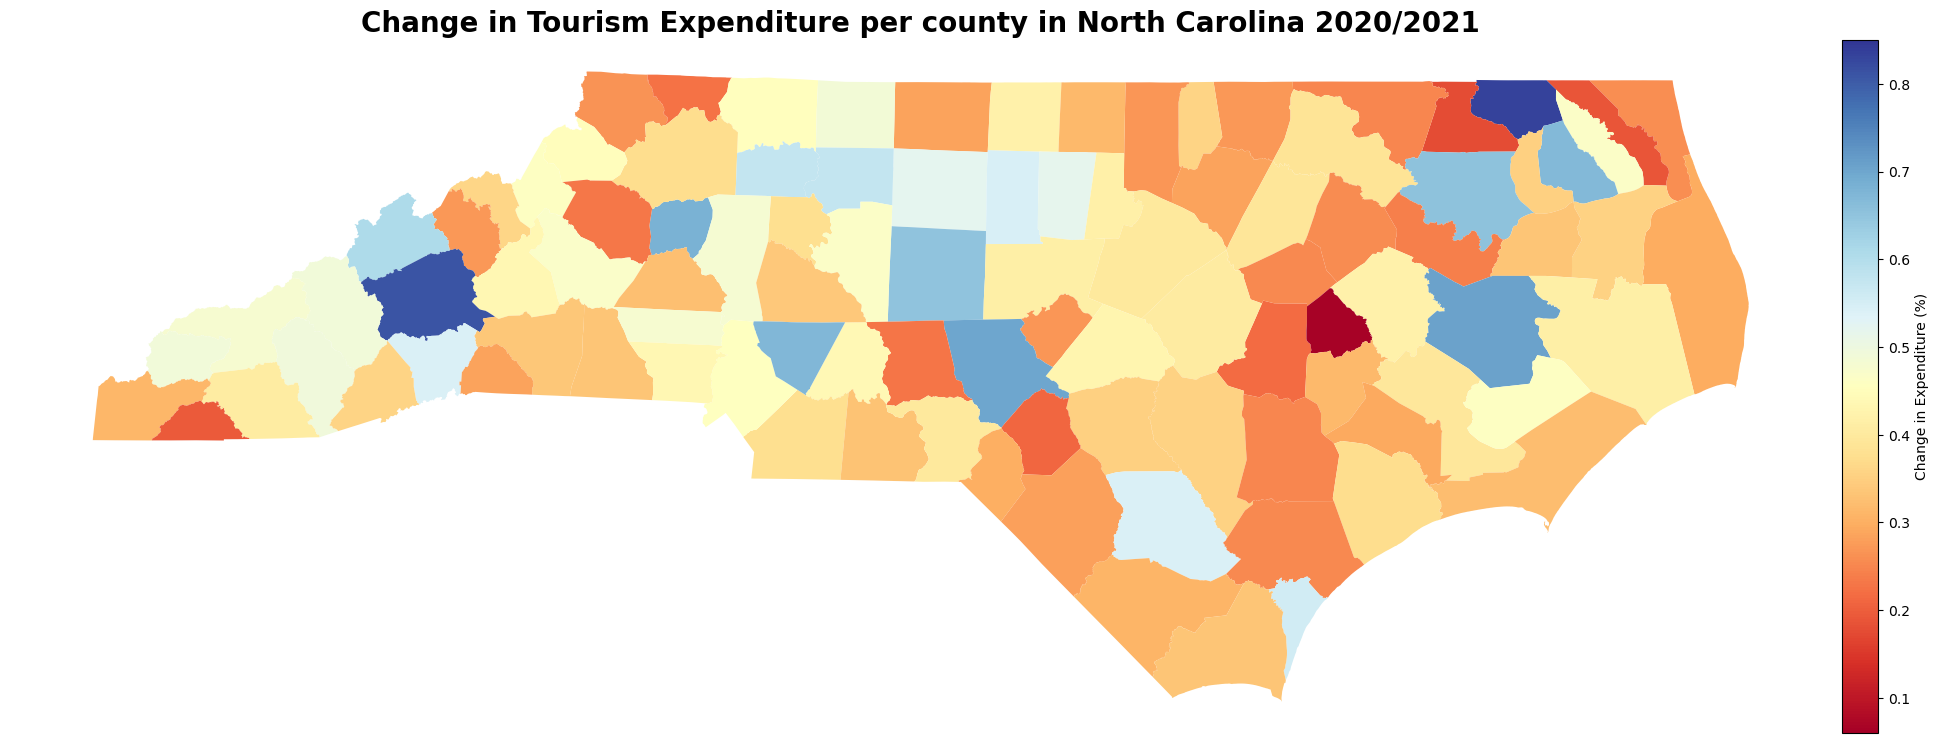

In [41]:

econcol = econ2021.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2021.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=0.06, vmax=0.85, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2020/2021', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=0.06, vmax=0.85))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()